In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r"C:\Users\Asus Vivobook\Downloads\Asss-1\train.csv")
df.head()


,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [2]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [3]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [4]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Income (USD)"]=df["Income (USD)"].fillna(df["Income (USD)"].mean())
df["Income Stability"]=df["Income Stability"].fillna(df["Income Stability"].mode()[0])
df["Type of Employment"]=df["Type of Employment"].fillna("unknown")
df["Current Loan Expenses (USD)"]=df["Current Loan Expenses (USD)"].fillna(df["Income (USD)"].mean())
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mean())
df["Credit Score"]=df["Credit Score"].fillna(df["Credit Score"].mean())
df["Has Active Credit Card"]=df["Has Active Credit Card"].fillna(df["Has Active Credit Card"].mode()[0])
df["Property Age"]=df["Property Age"].fillna(df["Property Age"].mean())
df["Property Location"]=df["Property Location"].fillna(df["Property Location"].mode()[0])

df.dropna(subset=["Loan Sanction Amount (USD)"], inplace=True)


In [5]:
df.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df.drop(columns=["Customer ID", "Name", "Property ID","Type of Employment","Profession"], inplace=True)




In [7]:
# Gender: M -> 1, F -> 0
df["Gender"] = df["Gender"].map({"M": 1, "F": 0})

# Expense Type 1: Y -> 1, N -> 0
df["Expense Type 1"] = df["Expense Type 1"].map({"Y": 1, "N": 0})
df["Expense Type 2"] = df["Expense Type 2"].map({"Y": 1, "N": 0})
# Has Active Credit Card: Active → 1, Inactive → 0, Unpossessed → -1
df["Has Active Credit Card"] = df["Has Active Credit Card"].map({
    "Active": 1,
    "Inactive": 0,
    "Unpossessed": -1
})

# Income Stability: Low → 0, High → 1
df["Income Stability"] = df["Income Stability"].map({
    "Low": 0,
    "High": 1
})

# Property Location: Rural → 0, Semi-Urban → 1, Urban → 2
df["Property Location"] = df["Property Location"].map({
    "Rural": 0,
    "Semi-Urban": 1,
    "Urban": 2
})

# Location (same mapping as Property Location if same values)
df["Location"] = df["Location"].map({
    "Rural": 0,
    "Semi-Urban": 1,
    "Urban": 2
})





In [8]:
df

,Gender,Age,Income (USD),Income Stability,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0,56,1933.050000,0,1,72809.58,241.08,0,0,3.000000,809.440000,0,1,1933.05000,4,0,1,119933.46,54607.18
1,1,32,4952.910000,0,1,46837.47,495.81,0,1,1.000000,780.400000,0,-1,4952.91000,2,0,1,54791.00,37469.98
2,0,65,988.190000,1,1,45593.04,171.95,0,1,1.000000,833.150000,0,-1,988.19000,2,2,0,72440.58,36474.43
3,0,65,2630.574417,1,0,80057.92,298.54,0,1,2.000000,832.700000,1,-1,2631.11944,2,1,1,121441.51,56040.54
4,0,31,2614.770000,0,1,113858.89,491.41,0,1,2.253027,745.550000,1,1,2614.77000,4,1,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,38,4969.410000,0,2,76657.90,722.34,1,1,2.000000,869.610000,0,-1,4969.41000,4,2,1,111096.56,68992.11
29996,1,20,1606.880000,0,1,66595.14,253.04,0,0,3.000000,729.410000,0,0,1606.88000,3,2,1,73453.94,46616.60
29997,0,49,2630.574417,0,2,81410.08,583.11,0,1,2.253027,739.885381,0,1,2631.11944,1,0,1,102108.02,61057.56
29998,1,38,2417.710000,0,1,142524.10,378.29,0,1,3.000000,677.270000,1,-1,2417.71000,4,2,1,168194.47,99766.87


In [9]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [10]:
x=df.drop('Loan Sanction Amount (USD)',axis=1)
y=df["Loan Sanction Amount (USD)"]
y

0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 29660, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)





In [12]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy="mean")  # or "median", "most_frequent"

# Fit on training data and transform both train and test
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [14]:
from sklearn.metrics import mean_squared_error,r2_score
r2_error=r2_score(y_test,y_pred)
print(r2_error)

0.5632559693538568


In [15]:
print(df.columns)

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')


C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15532\3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


<Figure size 1200x600 with 0 Axes>

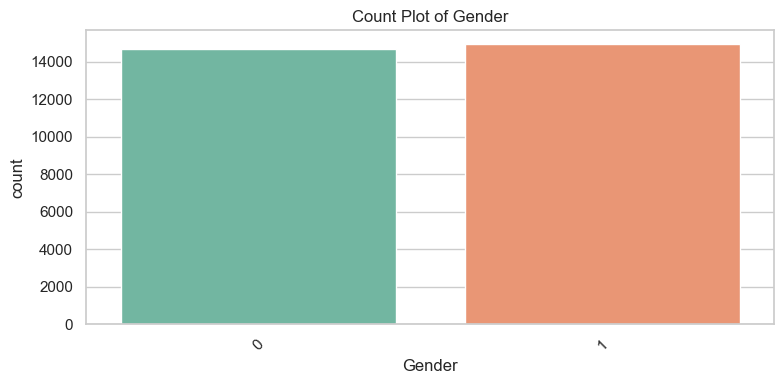

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15532\3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


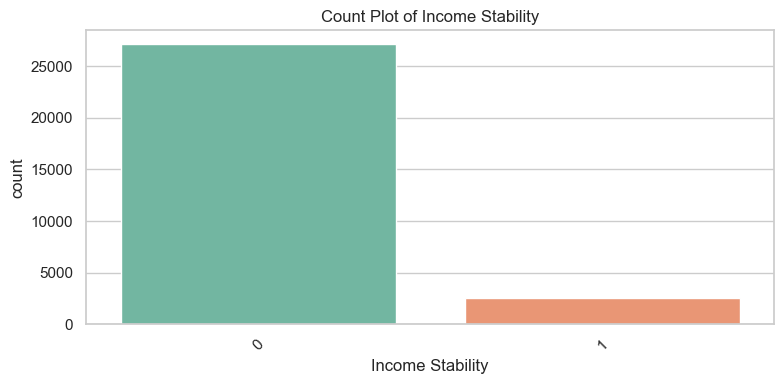

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15532\3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


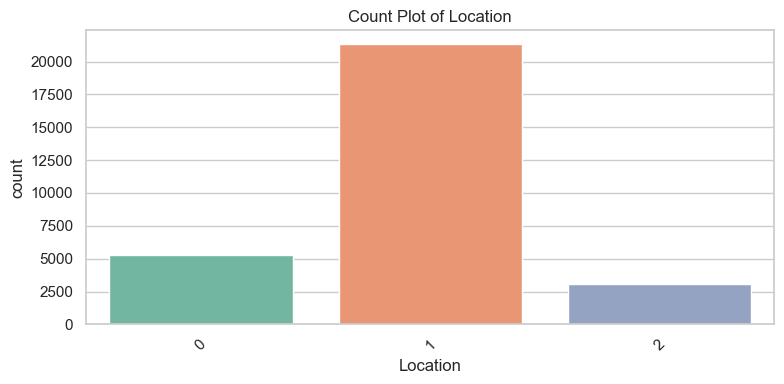

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15532\3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


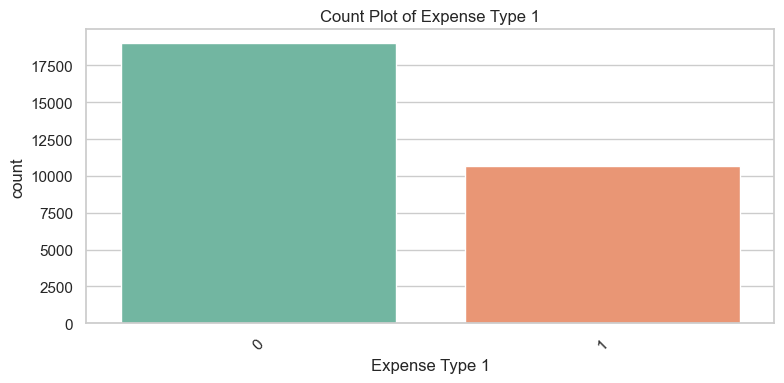

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15532\3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


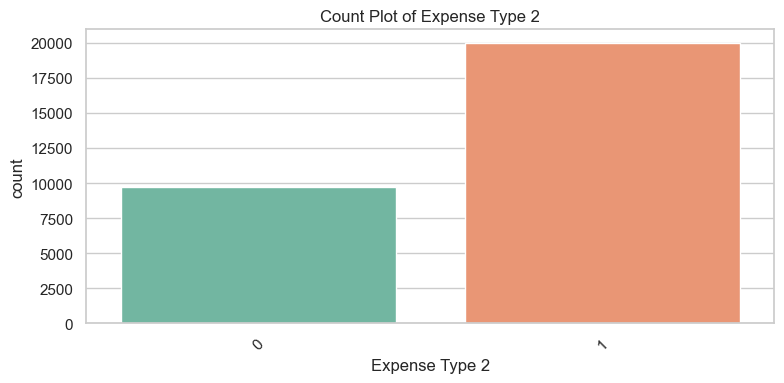

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15532\3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


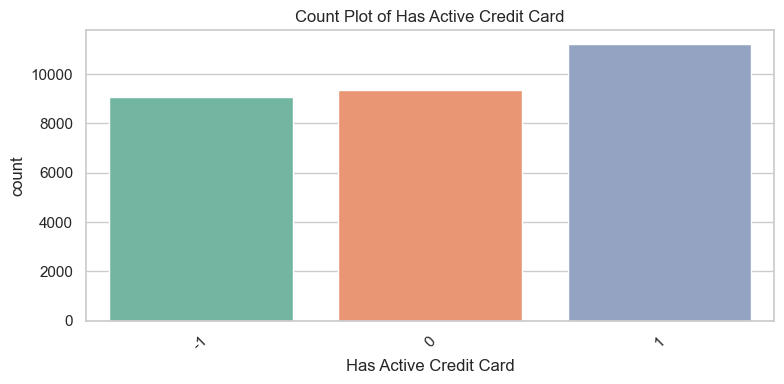

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15532\3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


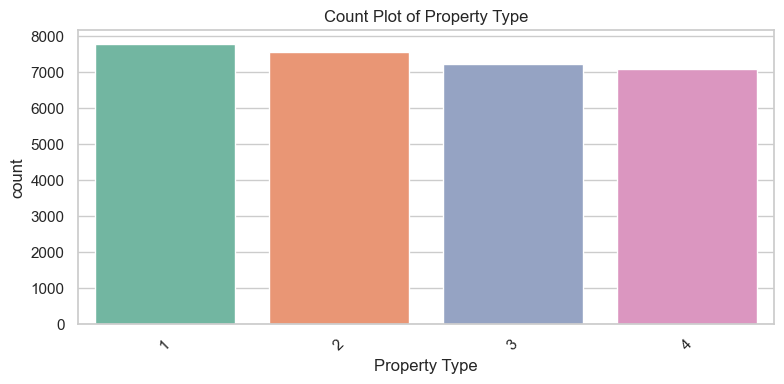

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15532\3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


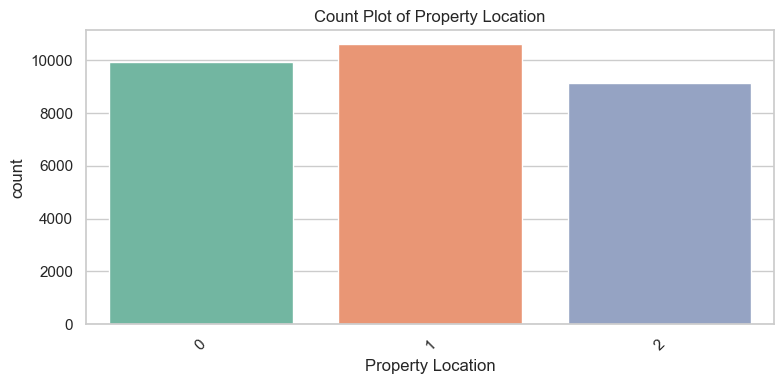

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15532\3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


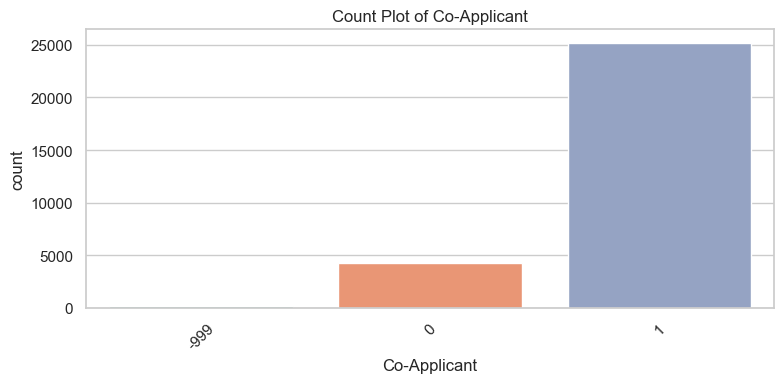

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# ----------------------------
# 1. Count Plots for Categorical Columns
# ----------------------------
categorical_cols = ['Gender', 'Income Stability', 'Location', 'Expense Type 1', 'Expense Type 2',
                    'Has Active Credit Card', 'Property Type', 'Property Location', 'Co-Applicant']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


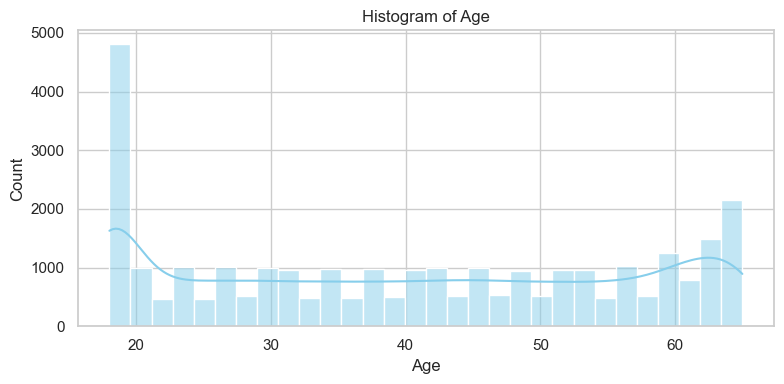

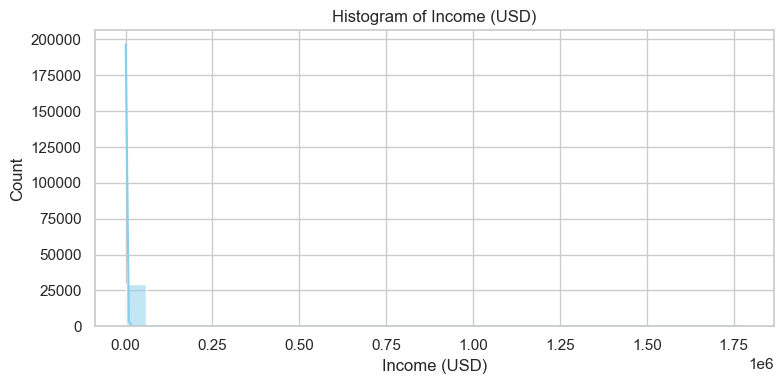

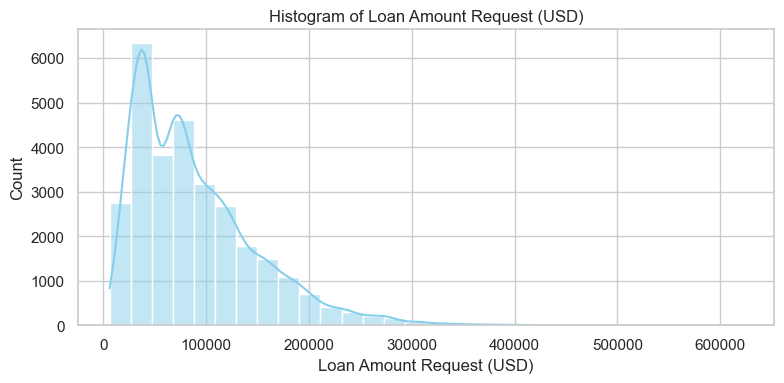

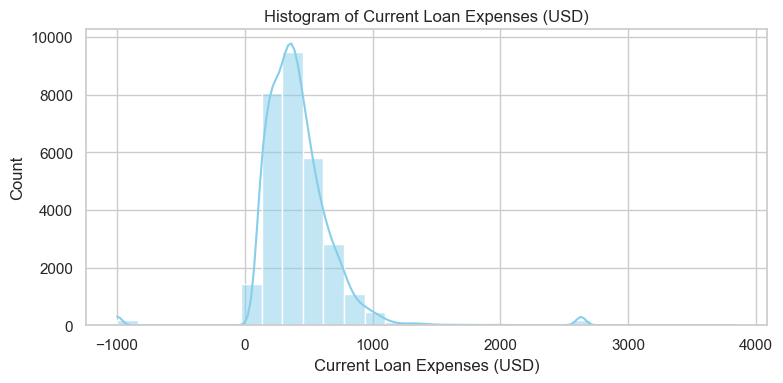

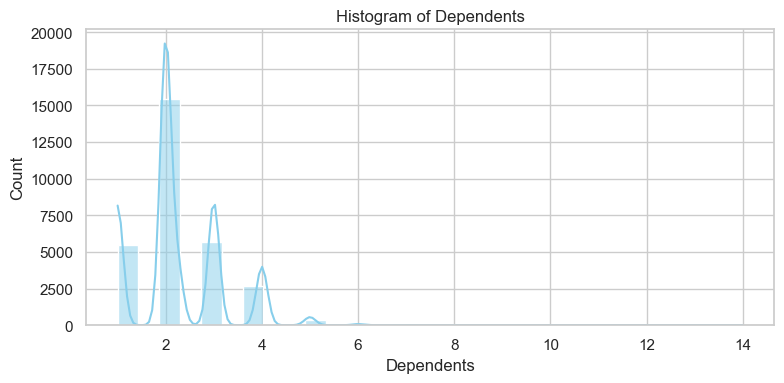

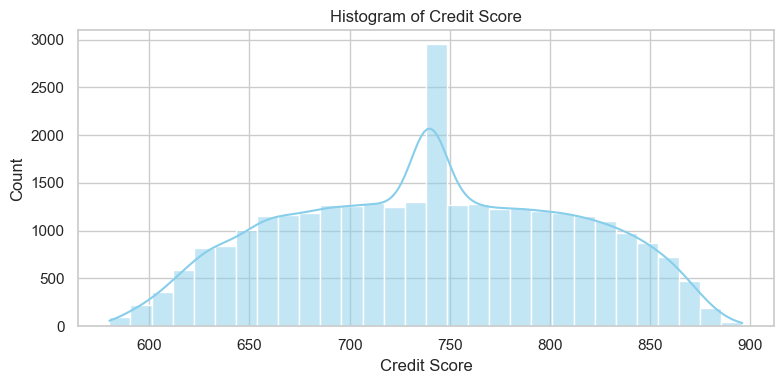

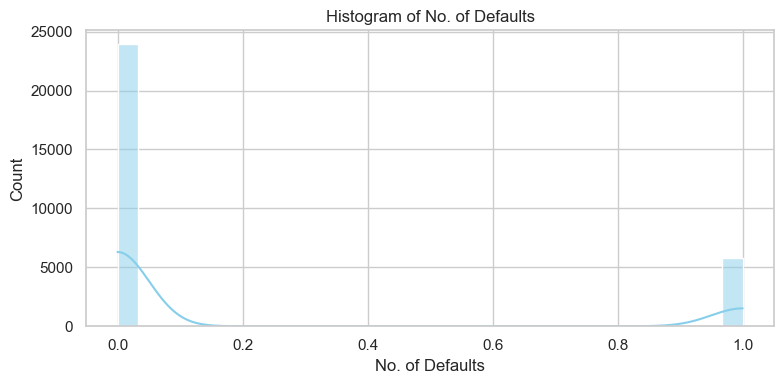

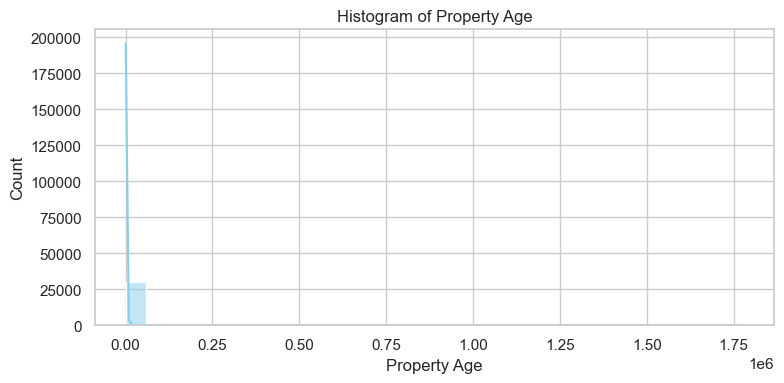

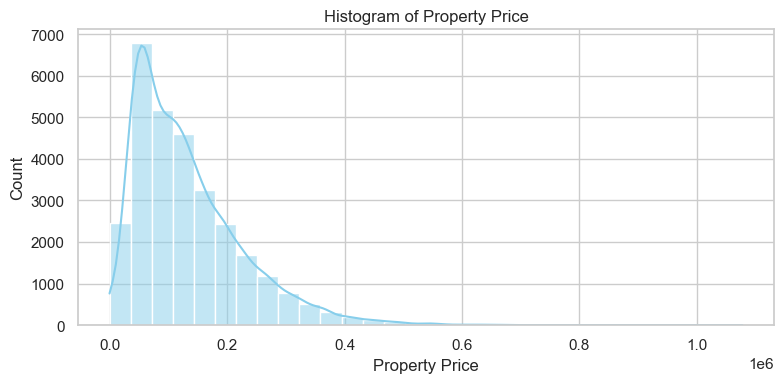

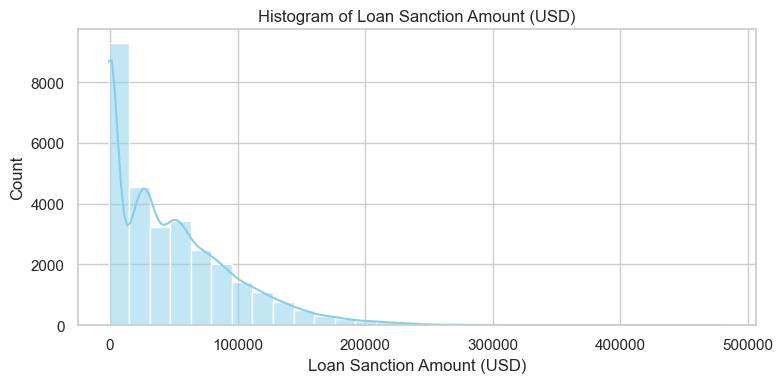

In [17]:
numerical_cols = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
                  'Dependents', 'Credit Score', 'No. of Defaults', 'Property Age',
                  'Property Price', 'Loan Sanction Amount (USD)']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your dataset
#df = pd.read_csv('your_dataset.csv')  # Replace with your file

# Define target and features
target = 'Loan Sanction Amount (USD)'
numerical_cols = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
                  'Dependents', 'Credit Score', 'No. of Defaults', 'Property Age',
                  'Property Price']
categorical_cols = ['Gender', 'Income Stability', 'Location', 'Expense Type 1', 'Expense Type 2',
                    'Has Active Credit Card', 'Property Type', 'Property Location', 'Co-Applicant']


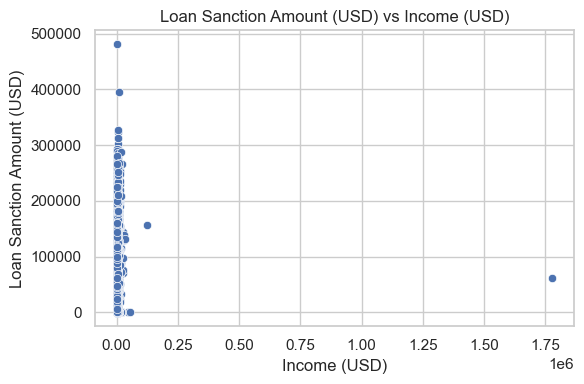

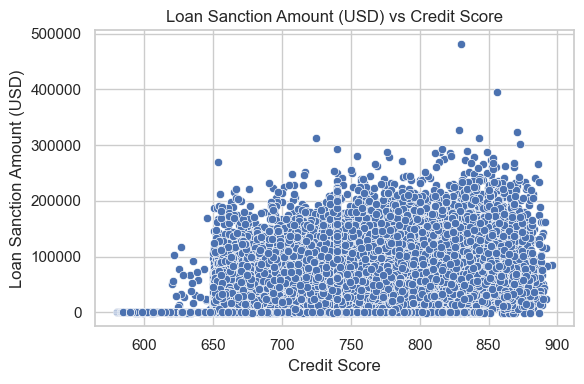

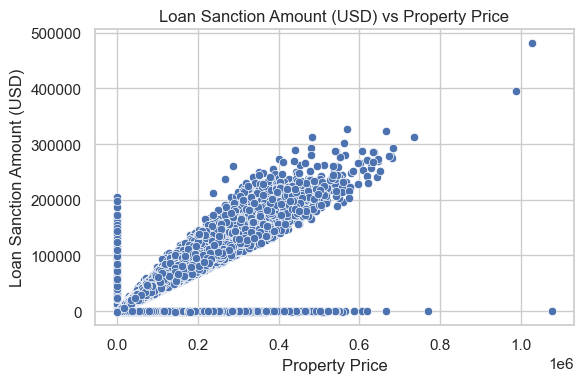

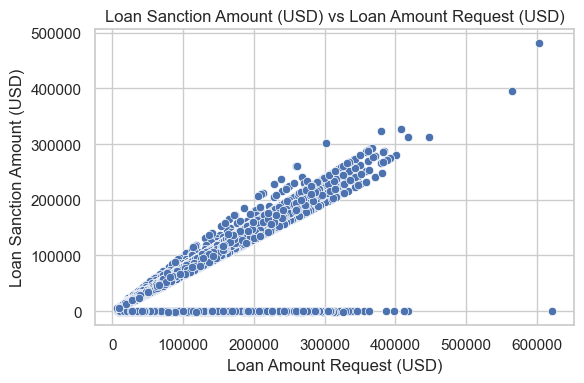

In [19]:
# 1. Scatter Plots
# -------------------------------
for col in ['Income (USD)', 'Credit Score', 'Property Price', 'Loan Amount Request (USD)']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y=target, data=df)
    plt.title(f"{target} vs {col}")
    plt.tight_layout()
    plt.show()


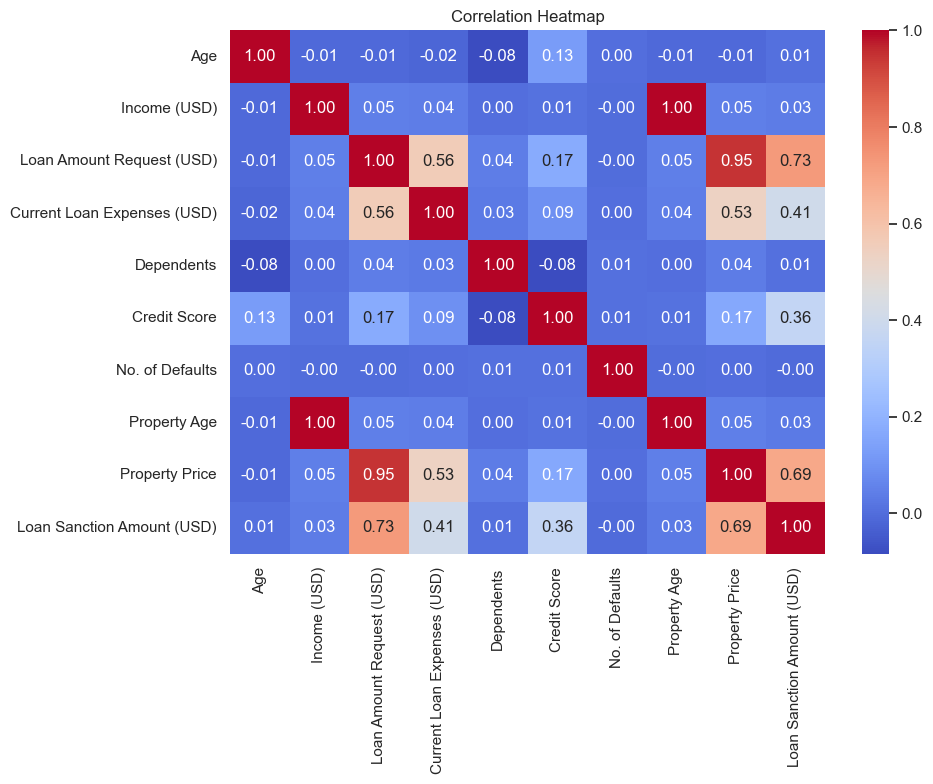

In [20]:
# 2. Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10, 8))
corr = df[numerical_cols + [target]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

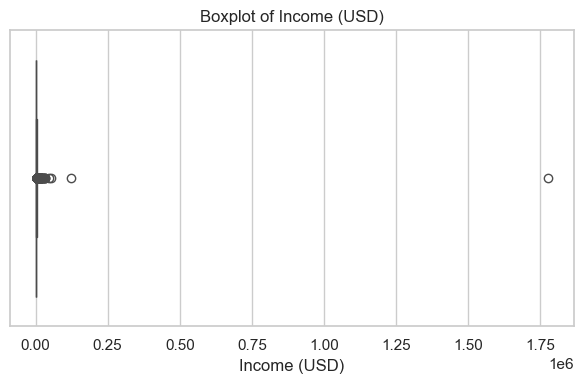

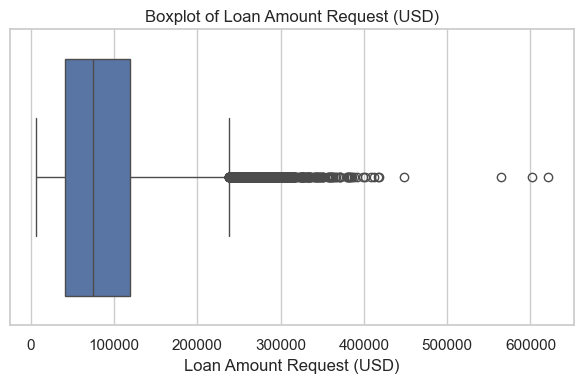

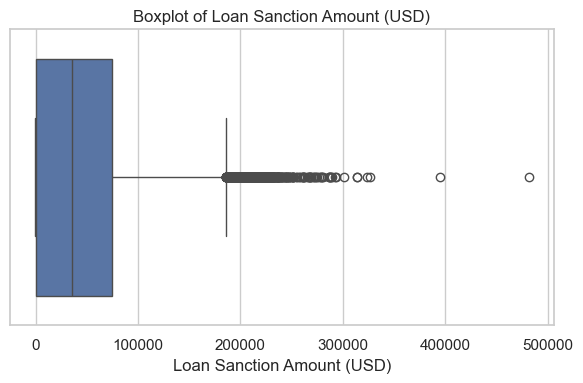

In [21]:
# 3. Boxplots for Outlier Detection
# -------------------------------
for col in ['Income (USD)', 'Loan Amount Request (USD)', target]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

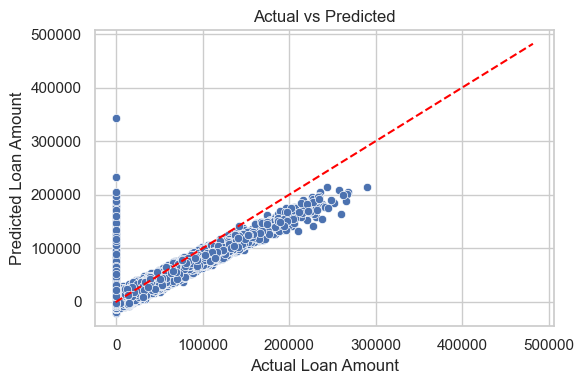

In [22]:
# 6. Actual vs Predicted Plot
# -------------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()

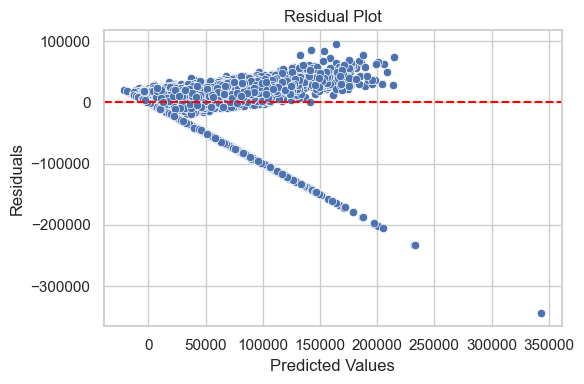

In [23]:
# 7. Residual Plot
residuals = y_test - y_pred
# -------------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

In [ ]:
# 8. Feature Coefficients Bar Plot
# -------------------------------
coefficients = pd.Series(model.coef_, index=df.columns).sort_values()
plt.figure(figsize=(10, 8))
coefficients.plot(kind='barh')
plt.title("Feature Importance (Linear Coefficients)")
plt.tight_layout()
plt.show()



NameError: name 'X' is not defined

In [25]:
# -------------------------------
# 9. Print Model Performance
# -------------------------------
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.5632559693538568
RMSE: 31522.865819084203


In [28]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Features and target
X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']

print("K-Fold Cross Validation Results:\n")

for k in range(2, 6):  # K = 2 to 5
    print(f"\n--- K = {k} ---")
    
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    mse_list = []
    mae_list = []
    rmse_list = []
    r2_list = []

    fold = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        mse_list.append(mse)
        mae_list.append(mae)
        rmse_list.append(rmse)
        r2_list.append(r2)

        print(f"  Fold {fold}:")
        print(f"    MSE:  {mse:.4f}")
        print(f"    MAE:  {mae:.4f}")
        print(f"    RMSE: {rmse:.4f}")
        print(f"    R²:   {r2:.4f}")
        fold += 1

    # Averages for this K
    print(f"\n  >> Average for K={k}:")
    print(f"     MSE:  {np.mean(mse_list):.4f}")
    print(f"     MAE:  {np.mean(mae_list):.4f}")
    print(f"     RMSE: {np.mean(rmse_list):.4f}")
    print(f"     R²:   {np.mean(r2_list):.4f}")


K-Fold Cross Validation Results:


--- K = 2 ---
  Fold 1:
    MSE:  979702352.6945
    MAE:  21429.7039
    RMSE: 31300.1973
    R²:   0.5657
  Fold 2:
    MSE:  978776338.3352
    MAE:  21768.3183
    RMSE: 31285.4014
    R²:   0.5911

  >> Average for K=2:
     MSE:  979239345.5148
     MAE:  21599.0111
     RMSE: 31292.7993
     R²:   0.5784

--- K = 3 ---
  Fold 1:
    MSE:  984298486.2601
    MAE:  21539.0673
    RMSE: 31373.5316
    R²:   0.5653
  Fold 2:
    MSE:  1059412247.1506
    MAE:  21515.1286
    RMSE: 32548.6136
    R²:   0.5417
  Fold 3:
    MSE:  976836120.1274
    MAE:  21782.2907
    RMSE: 31254.3776
    R²:   0.5929

  >> Average for K=3:
     MSE:  1006848951.1793
     MAE:  21612.1622
     RMSE: 31725.5076
     R²:   0.5666

--- K = 4 ---
  Fold 1:
    MSE:  979755205.5310
    MAE:  21491.0616
    RMSE: 31301.0416
    R²:   0.5684
  Fold 2:
    MSE:  977401542.4906
    MAE:  21566.0450
    RMSE: 31263.4218
    R²:   0.5638
  Fold 3:
    MSE:  1001951347.1027
   